Part 4 - Reconstructing a Stimulus
====================================



In this exercise, you will use the same method as Pipa et al. in the 2012 paper <a href="http://www.mitpressjournals.org/doi/abs/10.1162/NECO_a_00334">Precise mapping of V1 receptive fields by tomographic reconstruction</a>.

A light bar of angle $\alpha$ pans slowly from left to right over the visual field. At some point in time, the recorded cell will respond with an increase in firing rate.

Your goal is to fit a rate function that is sensitive enough to find the point of increased firing rate and then compute the position of the receptive field within the visual field.

In [8]:
import ni

data = ni.Data('data/Moving_bars_ouput_cell_0.pkl').cell(0).reduce_resolution(1)
print data

Spike data: 36 Condition(s) 20 Trial(s) of 1 Cell(s) in 7197 Time step(s). No other data.


ni/data/data.py:303: Warning: Lost 176 spikes in the process of reducing resolution.
  warn("Lost "+str(int(before_spikes - after_spikes))+" spikes in the process of reducing resolution.", Warning)


Hint: using `.reduce_resolution(2)` reduces the number of bins by a factor of 2. You can use this (or even higher factors) if you have too much data or want to test your models quickly. Keep in mind that history components now span a larger real-time distance if you do not reduce the `history_length` by the same factor.

In [9]:
model = ni.model.RateModel()
model.configuration.adaptive_rate = True
model.configuration.adaptive_rate_exponent = 4                 # solution
model.configuration.adaptive_rate_smooth_width = 100           # solution
model.configuration.knot_rate = 5                              # solution
model.backend = 'elasticnet'

In [10]:
rate_models = []
for c in range(data.nr_conditions):
    print c,
    fm = model.fit(data.condition(c).trial(range(10)))
    rate_models.append(fm.predict(data.condition(0).trial(0)))
rate_models = np.array(rate_models)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35


(36, 7197)

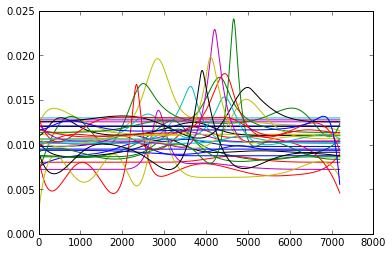

In [11]:
plot(rate_models.transpose())
rate_models.shape

(36, 359)

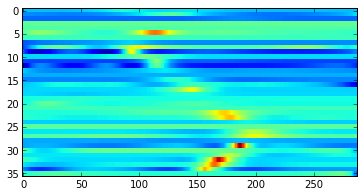

In [38]:
imshow(rate_models[:,::25],aspect='auto',interpolation='nearest') # solution
rate_models[:,32:][:,::20].shape                             # solution

The *iradon* function expects certain dimensions of its input. Since it gets an image that has degree on its x-axis and offset of the line on the y-axis, it is very important to know how many of your x-units correspond to one degree and which x-value corresponds to 0. The second argument of the *iradon* function (*theta*) is an optional array of reconstruction angles that correspond each to one of the columns in the previous image.

You need to choose a section out of the previous image and an array of angles that correspond to each column, such that the reconstruction can give you a small point. Trial-and-Error is allowed, but you should also consider a) thinking about what your x- and y- axis are and how the experiment parameters relate to the iradon transformation or b) try out values systematically

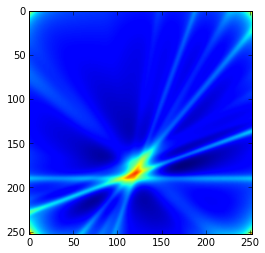

In [37]:
from skimage.transform.radon_transform import iradon

f = iradon(rate_models[:,32:][:,::20].transpose(), 360*arange(0,data.nr_conditions)/data.nr_conditions) # solution
imshow(f)                                                                                               

If you succeded in getting a point that all lines pass through, you have found the receptive field.

That's it for part 4!
==========================

If you want, you can save this version of the notebook (download "as Notebook .ipynb") and try everything with different cell. 